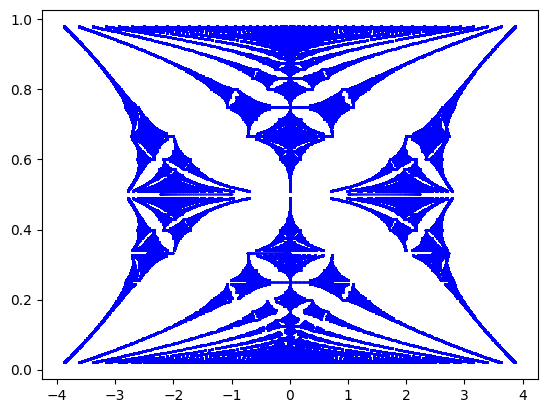

In [ ]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

pvals = []
qvals = []
bvals = []

# Precompute p, q, b values
for p in range(1, 49):
    for q in range(1, 50):
        if (p == 1 and q > 1) or (p < q and q % p != 0 and p != 1):
            b = p / q
            bvals.append(b)
            pvals.append(p)
            qvals.append(q)

def H(b, q,ky):
    H = np.zeros((q, q), dtype=complex)
    for i in range(q):
        H[i, i] = 2 * np.cos(2 * np.pi * i * b - ky)#chnaged here
        if i > 0:
            H[i, i-1] = 1
        if i < q-1:
            H[i, i+1] = 1
    H[0, q-1] = 1
    H[q-1, 0] = 1
    return H

i_ = 0
while i_ < len(qvals):
    q = qvals[i_]
    eigenvalues = []


    for ky in np.arange(-np.pi, np.pi, 0.01):
        u, _ = eig(H(bvals[i_], q,ky))
        eigenvalues.extend(u.real)  # Append real part of eigenvalues

    plt.scatter(eigenvalues, [bvals[i_]] * len(eigenvalues), s=0.01, color='blue')
    i_ += 1


plt.show()


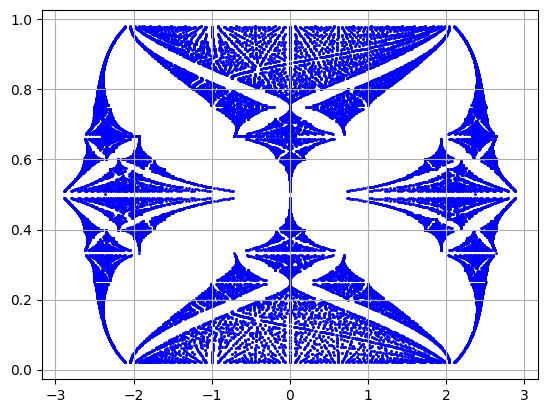

In [ ]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

sin = np.sin
cos= np.cos
pi=np.pi

pvals = []
qvals = []
bvals = []


dv=3.3706
def v(n,s,b):
  return 2*dv*(sin(pi*s*b)/(pi*s))*cos(2*pi*s*b*n + pi*b)

def V(n,b):
    lf=[]

    for j in range(1,2,1):
      lf.append(v(n,j,b))

    m=0
    S=0
    while m<len(lf):
      S=S+lf[m]
      m=m+1
    return S







# Precompute p, q, b values
for p in range(1, 49):
    for q in range(1, 50):
        if (p == 1 and q > 1) or (p < q and q % p != 0 and p != 1):
            b = p / q
            bvals.append(b)
            pvals.append(p)
            qvals.append(q)


def H(b, q):
    H = np.zeros((q, q), dtype=complex)
    for i in range(q):
        H[i, i] = V(i,b)#chnaged here
        if i > 0:
            H[i, i-1] = 1
        if i < q-1:
            H[i, i+1] = 1
    H[0, q-1] = 1
    H[q-1, 0] = 1
    return H


i_ = 0
while i_ < len(qvals):
    q = qvals[i_]
    eigenvalues = []



    u, _ = eig(H(bvals[i_], q,))
    eigenvalues.extend(u.real)  # Append real part of eigenvalues

    plt.scatter(eigenvalues, [bvals[i_]] * len(eigenvalues), s=1, color='blue')
    i_ += 1

plt.grid(True)
plt.show()

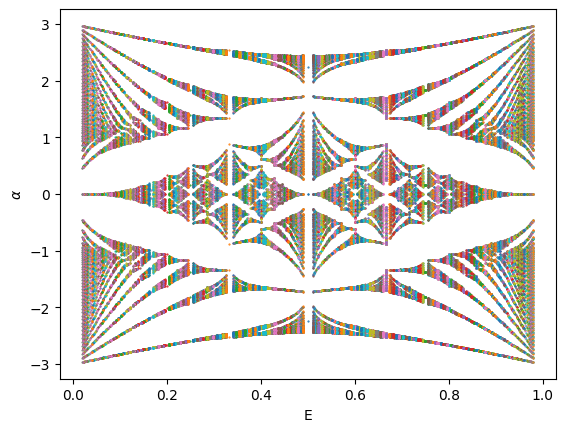

In [ ]:
#hoffstadter butterfly fo honey comb lattice

import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

e= np.e
pi= np.pi
i = 1j



pvals = []
qvals = []
bvals = []

# Precompute p, q, b values
for p in range(1, 49):
    for q in range(1, 50):
        if (p == 1 and q > 1) or (p < q and q % p != 0 and p != 1):
            b = p / q
            bvals.append(b)
            pvals.append(p)
            qvals.append(q)

A = np.zeros((2,2),dtype=int)
for m in range(2):
  for n in range(2):
    if m==0 and n==1:
      A[m,n]=1

A_ = A.transpose()

# print(A)
# print(A_)

def V(k,b,x):
  V= np.zeros((2,2), dtype='complex')
  for m in range(2):
    for n in range(2):
      if m-n==-1:
        V[m,n]= 1 + e**(i*(k -(2*pi*b*x)))
      elif m-n==1:
        V[m,n]= 1 + e**(-i*(k -(2*pi*b*x)))
  return(V)


#Hamiltonian

def H(q,k,b):
  H=np.zeros((2,q,2,q),dtype=complex)
  for m in range(q):
    for n in range(q):
      if m==n:
        H[:,m,:,n]=V(k,b,m)
      elif m==n-1:
        H[:,m,:,n]=A
      elif m==n+1:
        H[:,m,:,n]=A_

    H[:,0,:, q-1] = A_
    H[:,q-1,:,0] = A
  H= np.block([[H[: ,m, :, n] for n in range(q)] for m in range(q)])
  return(H)

# plotting the butterfly
i_ = 0
while i_ < len(qvals):
    q = qvals[i_]
    eigenvalues = []

    u,_=eig(H(q,0,bvals[i_]))
    eigenvalues.extend(np.real(u))
    plt.scatter([bvals[i_]] * len(eigenvalues),eigenvalues,s=0.3)
    i_ =i_+1



plt.show()




















[0.006278251794875147, 0.006278251794875064, 0.006278251794875038, 0.0062782517948757124, 0.006278251794874599, 0.006278251794875563, 0.00627825179487429, 0.006278251794877031, 0.0062782517948758824, 0.006278251794876087, 0.006278251794874443, 0.0062782517948733775, 0.00627825179487493, 0.006278251794876569, 0.0062782517948725206, 0.006278251794876724, 0.006278251794876458, 0.006278251794871877, 0.006278251794879196, 0.006278251794870043, 0.006278251794876288, 0.006278251794873282, 0.006278251794874511, 0.006278251794870526, 0.006278251794871709, 0.0062782517948773865, 0.006278251794878653, 0.0062782517948763526, 0.006278251794875121, 0.00627825179488202, 0.006278251794872262, 0.0062782517948773015, 0.00627825179487255, 0.006278251794879725, 0.0062782517948818395, 0.006278251794878294, 0.0062782517948742605, 0.0062782517948651315, 0.006278251794875128, 0.0062782517948722855, 0.006278251794881614, 0.006278251794879671, 0.006278251794876004, 0.006278251794877399, 0.006278251794873327, 0.

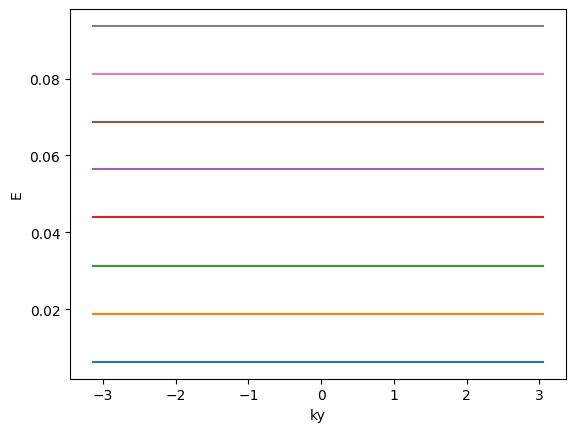

In [ ]:
#landau levels
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig


b=1/1000 #small magnetic field
q=1000
def H(b,q,ky):
    H = np.zeros((q, q))
    for i in range(q):
        H[i, i] = 4+2 * np.cos(2 * np.pi * i * b - ky)#chnaged here
        if i > 0:
            H[i, i-1] = 1
        if i < q-1:
            H[i, i+1] = 1
    H[0, q-1] = 1
    H[q-1, 0] = 1
    return H

band1=[]
band2=[]
band3=[]
band4=[]
band5=[]
band6=[]
band7=[]
band8=[]

kvals = np.arange(-np.pi, np.pi,0.1)

for k in kvals:
  eigenvalues=[]
  u,_= eig(H(b,q,k))
  eigenvalues.extend(u)
  eigenvalues.sort()

  band1.append(eigenvalues[0])
  band2.append(eigenvalues[1])
  band3.append(eigenvalues[2])
  band4.append(eigenvalues[3])
  band5.append(eigenvalues[4])
  band6.append(eigenvalues[5])
  band7.append(eigenvalues[6])
  band8.append(eigenvalues[7])

print(band1)
for j in range(10):
  print(band2[j]-band1[j])



plt.plot(kvals,band1)
plt.plot(kvals,band2)
plt.plot(kvals,band3)
plt.plot(kvals,band4)
plt.plot(kvals,band5)
plt.plot(kvals,band6)
plt.plot(kvals,band7)
plt.plot(kvals,band8)


plt.xlabel('ky')
plt.ylabel('E')
plt.show()















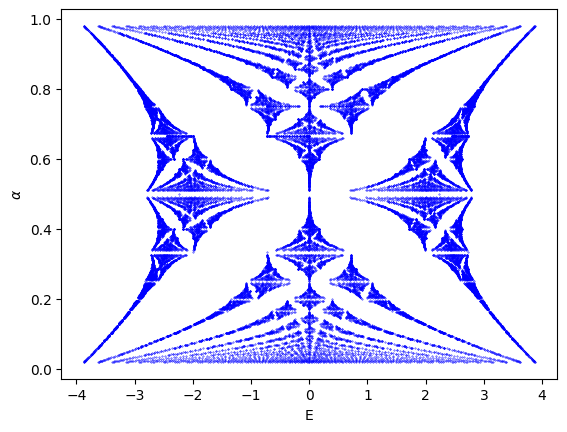

In [ ]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

pvals = []
qvals = []
bvals = []

# Precompute p, q, b values
for p in range(1, 49):
    for q in range(1, 50):
        if (p == 1 and q > 1) or (p < q and q % p != 0 and p != 1):
            b = p / q
            bvals.append(b)
            pvals.append(p)
            qvals.append(q)

def H(b, q):
    H = np.zeros((q, q), dtype=complex)
    for i in range(q):
        H[i, i] = 2 * np.cos(2 * np.pi * i * b )#chnaged here
        if i > 0:
            H[i, i-1] = 1
        if i < q-1:
            H[i, i+1] = 1
    H[0, q-1] = 1
    H[q-1, 0] = 1
    return H

i_ = 0
while i_ < len(qvals):
    q = qvals[i_]
    eigenvalues = []



    u, _ = eig(H(bvals[i_], q))
    eigenvalues.extend(u.real)  # Append real part of eigenvalues

    plt.scatter(eigenvalues, [bvals[i_]] * len(eigenvalues), s=0.1,color='blue')
    i_ += 1

plt.xlabel('E')
plt.ylabel(r'$\alpha$')
plt.show()